<!-- Banner Image -->
<img src="https://uohmivykqgnnbiouffke.supabase.co/storage/v1/object/public/landingpage/brevdevnotebooks.png" width="100%">

<!-- Links -->
<center>
  <a href="https://console.brev.dev" style="color: #06b6d4;">Console</a> •
  <a href="https://brev.dev" style="color: #06b6d4;">Docs</a> •
  <a href="/" style="color: #06b6d4;">Templates</a> •
  <a href="https://discord.gg/NVDyv7TUgJ" style="color: #06b6d4;">Discord</a>
</center>

# Run ControlNet Models on Stable Diffusion WebUI, AUTOMATIC1111 🤙

Welcome!

In this notebook, we will run [ControlNet models](https://github.com/lllyasviel/ControlNet) on the the Stable Diffusion WebUI, AUTOMATIC1111. This UI lets you play around with Stable Diffusion image generatation, and the ControlNet models, without needing any code!

For example (please download this notebook to see the examples as images currently don't load on GitHub): 

<img src="https://github.com/lllyasviel/ControlNet/raw/main/github_page/p20.png" width="50%">
<img src="https://github.com/lllyasviel/ControlNet/raw/main/github_page/p17.png" width="50%">

See the [Github repo](https://github.com/lllyasviel/ControlNet) for more examples!

### Help us make this tutorial better! Please provide feedback on the [Discord channel](https://discord.gg/T9bUNqMS8d) or on [X](https://x.com/harperscarroll).

A note about running Jupyter Notebooks: Press Shift + Enter to run a cell. A * in the left-hand cell box means the cell is running. A number means it has completed. If your Notebook is acting weird, you can interrupt a too-long process by interrupting the kernel (Kernel tab -> Interrupt Kernel) or even restarting the kernel (Kernel tab -> Restart Kernel). Note restarting the kernel will require you to run everything from the beginning.

## Let's begin!

I used a GPU from [brev.dev](https://brev.dev). I used an A10G, with 24GB GPU Memory, 16 GB RAM, 120 GB storage. This machine is about $1/hr. 

Click the badge below to get your preconfigured instance:

[![ Click here to deploy.](https://brev-assets.s3.us-west-1.amazonaws.com/nv-lb-dark.svg)](https://console.brev.dev/environment/new?instance=A10G:g5.xlarge&diskStorage=120&name=controlnet&file=https://github.com/brevdev/notebooks/raw/main/controlnet.ipynb&python=3.10&cuda=12.0.1)

Once you've checked out your machine and landed in your instance page, select the specs you'd like (I used **Python 3.10 and CUDA 12.0.1**; these should be preconfigured for you if you use the badge above) and click the "Build" button to build your verb container. Give this a few minutes.

A few minutes after your model has started Running, click the 'Notebook' button on the top right of your screen once it illuminates (you may need to refresh the screen). You will be taken to a Jupyter Lab environment, where you can upload this Notebook.

Note: You can connect your cloud credits (AWS or GCP) by clicking "Org: " on the top right, and in the panel that slides over, click "Connect AWS" or "Connect GCP" under "Connect your cloud" and follow the instructions linked to attach your credentials.

In [1]:
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git

Cloning into 'stable-diffusion-webui'...
remote: Enumerating objects: 28575, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 28575 (delta 82), reused 107 (delta 60), pack-reused 28419
Receiving objects: 100% (28575/28575), 32.74 MiB | 54.86 MiB/s, done.
Resolving deltas: 100% (20025/20025), done.


In [ ]:
!pip install -q -U xformers
!sudo apt-get update && sudo apt-get -q install ffmpeg libsm6 libxext6  -y

In [3]:
import os
os.chdir('stable-diffusion-webui')

## Now run this, and just leave it running! When it completes, a window will pop up with your UI!
If you have any issues, go to http://127.0.0.1:7860/ in your browser when you see output like "Model loaded in 3.0s...".
If you still have issues, run `brev port-forward controlnet -p 7860:7860` on a terminal on your LOCAL machine (i.e. NOT from within this machine/notebook, but on your laptop). If you chose a different machine name, replace `controlnet` with that name.

In [ ]:
!bash <(wget -qO- https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/webui.sh)

# Install ControlNet

In your AUTOMATIC1111 WebUI,
 1) Open the "Extensions" tab.
 2) Click "Install from URL".
 3) Enter `https://github.com/Mikubill/sd-webui-controlnet.git` into "URL for extension's git repository".
 4) Press "Install".
 5) Wait until you see the message "Installed into /home/ubuntu/stable-diffusion-webui/extensions/sd-webui-controlnet. Use Installed tab to restart".
 6) Go to "Installed" tab, click "Check for updates", and then click "Apply and restart UI". (The next time you can also use these buttons to update ControlNet.)
 7) Close the AUTOMATIC1111 WebUI browser. In the Jupyter Lab tabs, go to Kernel -> Interrupt Kernel. 

Then, run the following cell. AUTOMATIC1111 should pop up again as before, but if you have any issues, go to http://127.0.0.1:7860/ in your browser when you see output like "Model loaded in 3.0s...".

Now, you should be able to see the ControlNet models in your UI, like so:

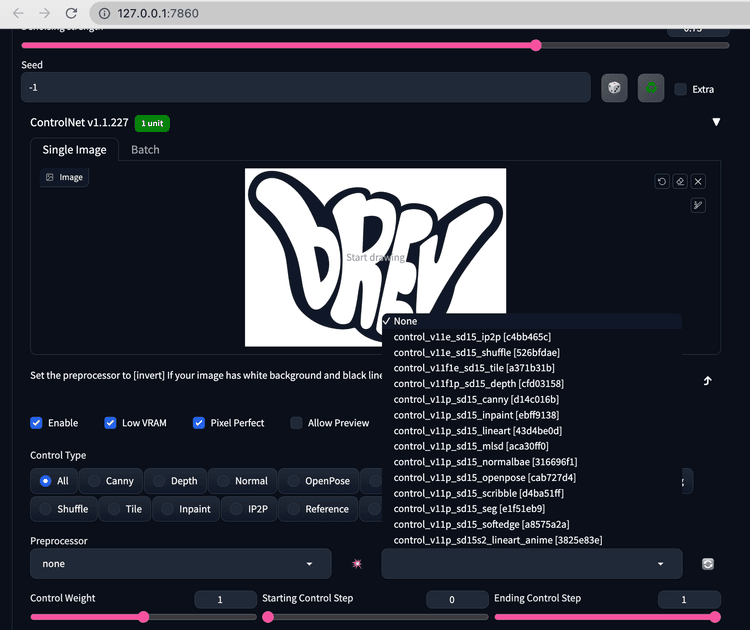

Note that running the models sometimes takes time! You can check the output below for updates on model progress.

## Running ControlNet Example

[![Running ControlNet Example](https://cdn.loom.com/sessions/thumbnails/bf48068ab5ff4908a3a60303f8f8349a-with-play.gif)](https://www.loom.com/share/bf48068ab5ff4908a3a60303f8f8349a)

If you'd like to increase the number of ControlNet units/models, go to Settings --> ControlNet and set "Multi ControlNet: Max models amount (requires restart)" to as many as you'd like. Click "Apply Settings" and then "Reload UI". Note you may need to re-open on a new browser tab/window if it doesn't reload on the same window.


In [ ]:
os.chdir('/home/ubuntu')

!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!sudo apt-get install git-lfs
!git lfs install

os.chdir('/home/ubuntu/stable-diffusion-webui/extensions/sd-webui-controlnet/models')

!git clone https://huggingface.co/lllyasviel/ControlNet-v1-1
!git lfs fetch
!mv ControlNet-v1-1/*.pth .
!rm -rf ControlNet-v1-1

os.chdir('/home/ubuntu/stable-diffusion-webui/')

!bash <(wget -qO- https://raw.githubusercontent.com/AUTOMATIC1111/stable-diffusion-webui/master/webui.sh)